In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_datareader as data 

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf 
import datetime as dt

stock = 'POWERGRID.NS'
start = '2000-01-01'
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,,
2007-10-05,32.764328,56.587513,61.593765,46.771885,50.512512,855215656
2007-10-08,31.087029,53.690639,58.500015,53.353138,58.500015,126671715
2007-10-09,33.203987,57.346889,57.853138,50.821888,53.718761,116725709
2007-10-10,33.513397,57.881264,59.062515,57.375015,58.837513,67931378
2007-10-11,37.258820,64.350014,67.500015,57.375015,67.500015,106320954


In [4]:
df.shape

(4208, 6)

In [5]:
# Reset the index
df = df.reset_index() 

In [6]:
df.columns

MultiIndex([(     'Date',             ''),
            ('Adj Close', 'POWERGRID.NS'),
            (    'Close', 'POWERGRID.NS'),
            (     'High', 'POWERGRID.NS'),
            (      'Low', 'POWERGRID.NS'),
            (     'Open', 'POWERGRID.NS'),
            (   'Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [7]:
df.to_csv('powergrid.csv')

In [8]:
df = pd.read_csv('powergrid.csv')

In [9]:
df[df.columns[1:]] = df[df.columns[1:]].apply(pd.to_numeric, errors='coerce')

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df

,Price,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaT,32.764328,56.587513,61.593765,46.771885,50.512512,855215656.0
2,1,NaT,31.087029,53.690639,58.500015,53.353138,58.500015,126671715.0
3,2,NaT,33.203987,57.346889,57.853138,50.821888,53.718761,116725709.0
4,3,NaT,33.513397,57.881264,59.062515,57.375015,58.837513,67931378.0
...,...,...,...,...,...,...,...,...
4204,4203,NaT,311.331116,315.799988,321.500000,313.250000,321.500000,12979410.0
4205,4204,NaT,313.795746,318.299988,320.450012,310.750000,314.500000,9610615.0
4206,4205,NaT,316.013916,320.549988,321.200012,314.149994,316.100006,15856332.0
4207,4206,NaT,313.943665,318.450012,325.399994,316.750000,318.549988,14498110.0


In [12]:
#Candlestick chart
#%pip install nbformat
import plotly.graph_objects as go 

fig = go.Figure(data=[go.Candlestick(x=df['Date'], open=df['Open'],
                                     high=df['High'], 
                                     low=df['Low'], 
                                     close=df['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [13]:
df = df.drop(['Date', 'Adj Close'], axis=1)

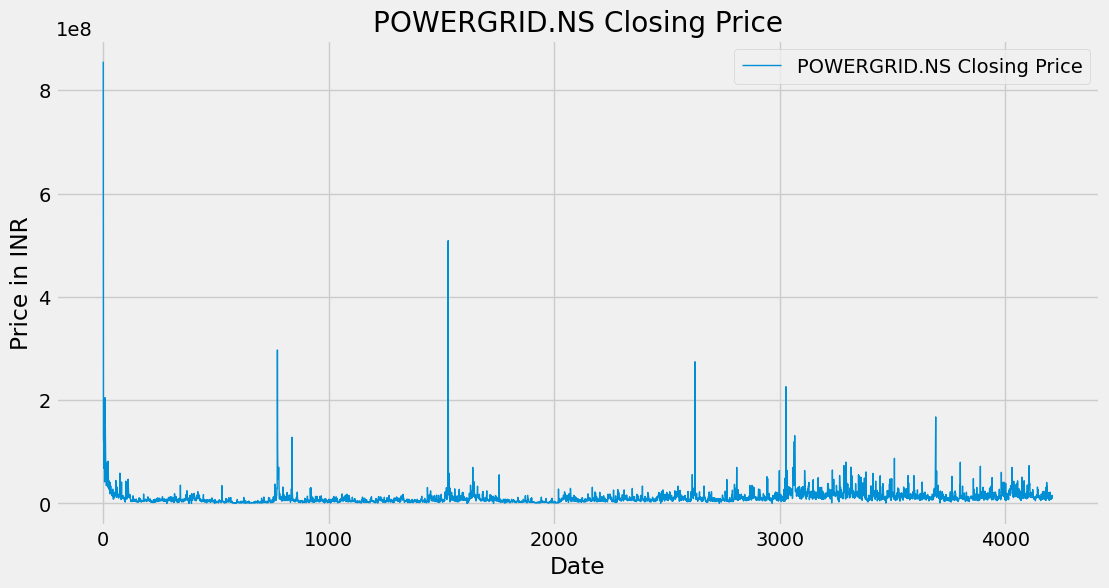

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label= f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price in INR')
plt.legend()
plt.show()

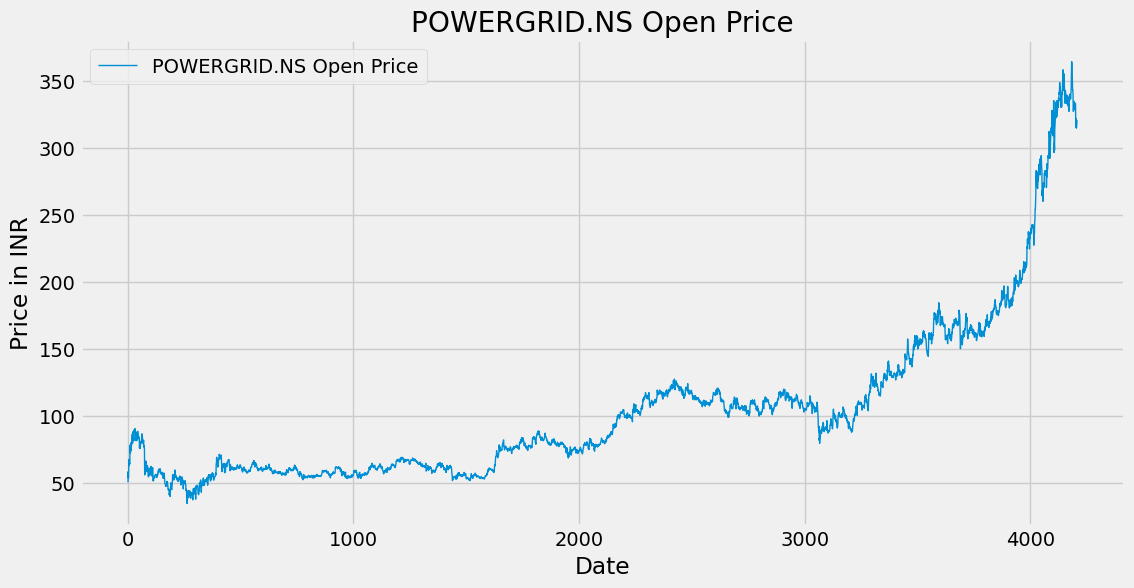

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label= f'{stock} Open Price', linewidth = 1)
plt.title(f'{stock} Open Price')
plt.xlabel('Date')
plt.ylabel('Price in INR')
plt.legend()
plt.show()

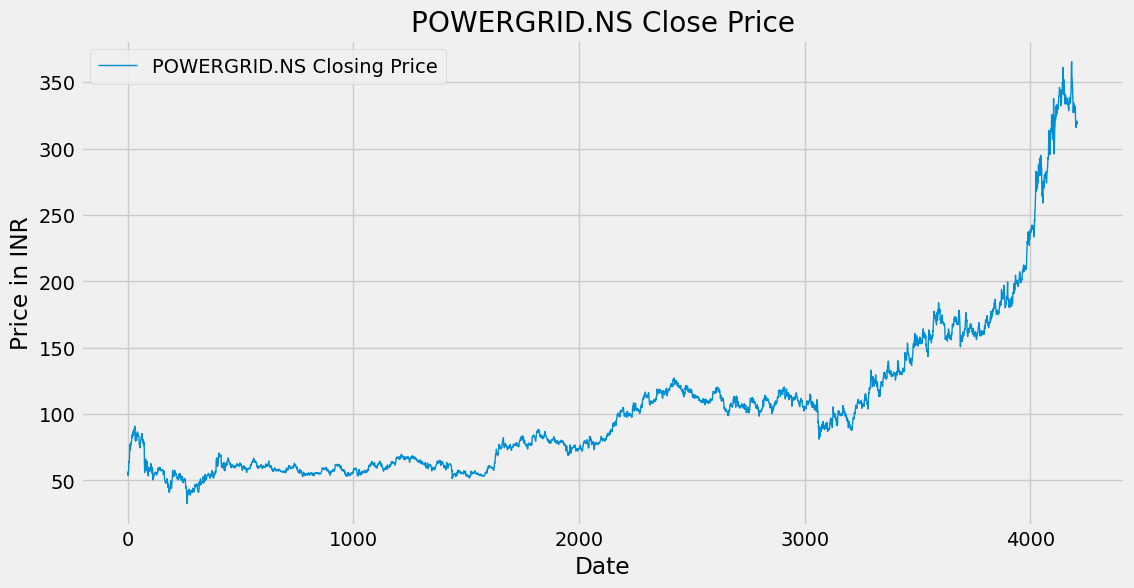

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label= f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Close Price')
plt.xlabel('Date')
plt.ylabel('Price in INR')
plt.legend()
plt.show()

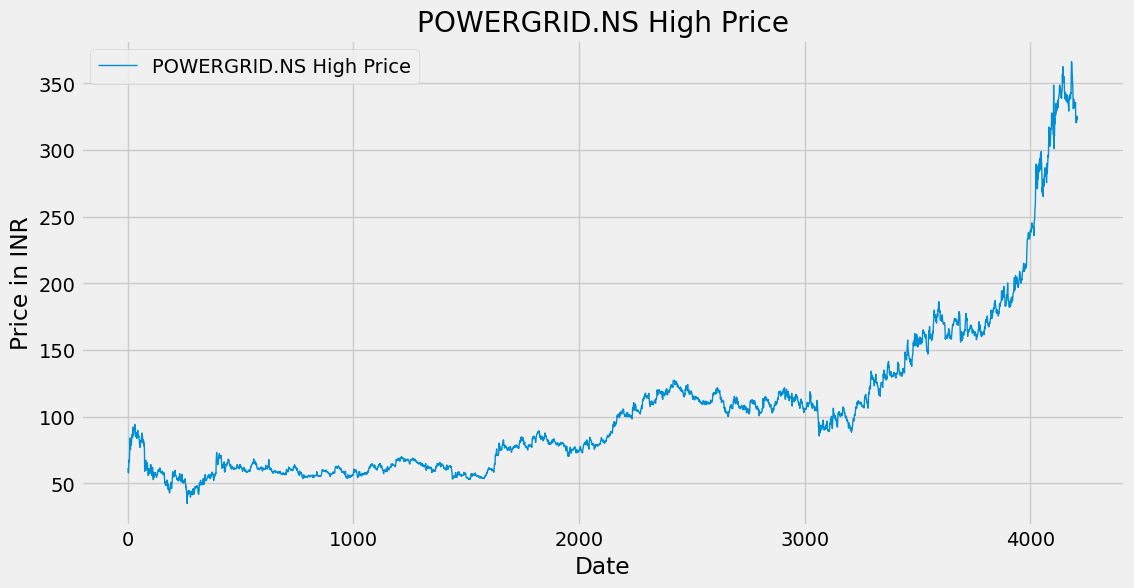

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label= f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High Price')
plt.xlabel('Date')
plt.ylabel('Price in INR')
plt.legend()
plt.show()

In [18]:
#Moving Average is nothing but the average of the stock price over a certain period of time
# Calculate the moving average 
ma100 = df['Close'].rolling(window=100).mean()


In [19]:
ma200 = df['Close'].rolling(window=200).mean()

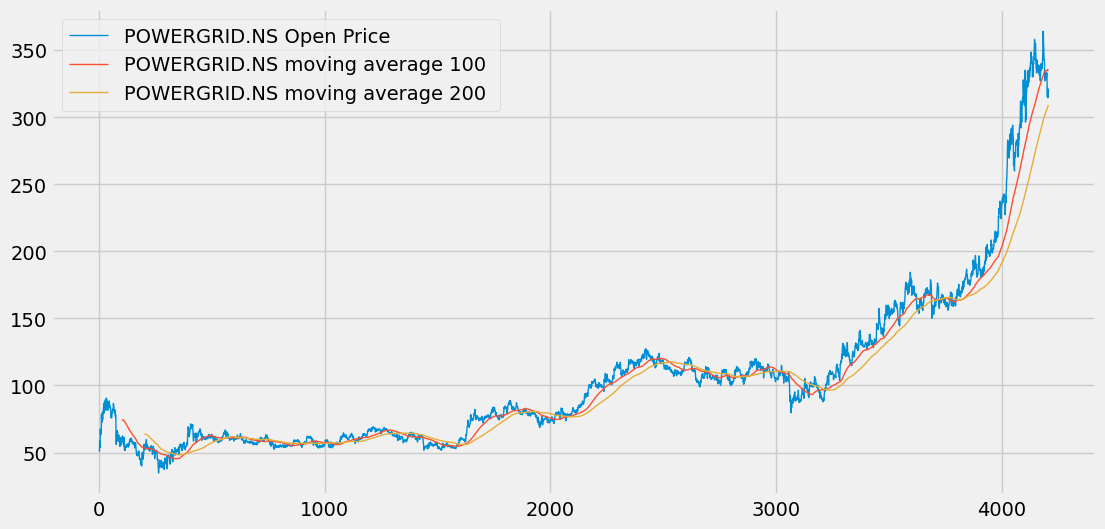

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label= f'{stock} Open Price', linewidth = 1)
plt.plot(ma100, label= f'{stock} moving average 100 ', linewidth = 1)
plt.plot(ma200, label= f'{stock} moving average 200', linewidth = 1)
plt.legend()
plt.show()

In [21]:
ema100 = df['Close'].ewm(span=100, adjust=False).mean()

In [22]:
ema200 = df['Close'].ewm(span=200, adjust=False).mean()

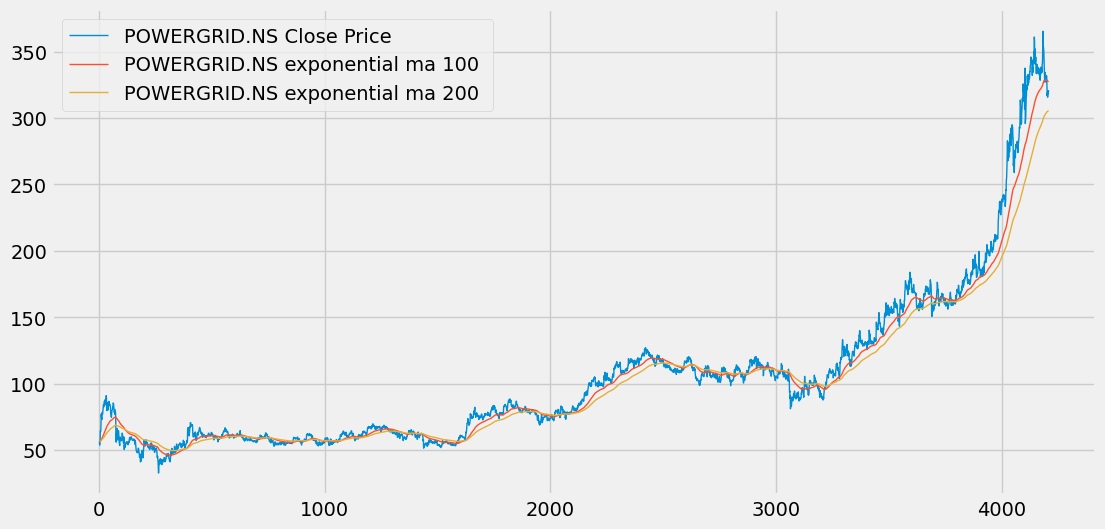

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label= f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label= f'{stock} exponential ma 100 ', linewidth = 1)
plt.plot(ema200, label= f'{stock} exponential ma 200', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
#LSTM over RNN because LSTM is capable of learning long-term dependencies
data_train = pd.DataFrame(df.Close[:int(len(df)*0.80)])
data_test = pd.DataFrame(df.Close[int(len(df)*0.80): len(df)])

In [25]:
data_train = data_train.dropna()

In [26]:

print("NaN in x_train:", np.isnan(data_train).any())
print("NaN in y_train:", np.isnan(data_test).any())


NaN in x_train: Close    False
dtype: bool
NaN in y_train: Close    False
dtype: bool


In [27]:
data_train.shape[0], data_test.shape[0]

(3366, 842)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [29]:
data_train_scale = scaler.fit_transform(data_train)   

In [30]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i, 0])



In [31]:
x, y = np.array(x), np.array(y)

In [32]:
x.shape, y.shape

((3266, 100, 1), (3266,))

'''LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D 
2D -> (batch_size units)
3D -> (batc_size, time_steps, units)'''

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [34]:
model = Sequential() 
model.add(LSTM(units=50, activation='relu', return_sequences=True, 
               input_shape=((x.shape[1], 1))))

model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

d:\Machine learning\stock_price_prediction\stock-env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 56s 460ms/step - loss: 0.0889
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 47s 459ms/step - loss: 0.0084
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 45s 440ms/step - loss: 0.0077
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 45s 435ms/step - loss: 0.0070
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 40s 386ms/step - loss: 0.0061
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 319ms/step - loss: 0.0055
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 34s 329ms/step - loss: 0.0055
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 34s 326ms/step - loss: 0.0049
Epoch 9/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 36s 351ms/step - loss: 0.0060
Epoch 10/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 37s 359ms/step - loss: 0.0050
Epoch 11/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 36s 350ms/step - loss: 0.0043
Epoch 12/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 38s 369ms/step - loss: 0.0042
Epoch 13/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 35s 338ms/step - loss: 0.0038
Epoch 14/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 35s 340ms/step - loss: 0.0035
Epoch 15/50
103

In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [53]:
past_100_days = data_train.tail(100)

In [54]:
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

In [55]:
data_test

,Close
0,114.496902
1,114.496902
2,114.581276
3,115.312531
4,115.368774
...,...
1037,315.799988
1038,318.299988
1039,320.549988
1040,318.450012


In [56]:
data_test_scale = scaler.fit_transform(data_test)  

In [57]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])
x, y = np.array(x), np.array(y)

In [58]:
data_test_scale.shape, x.shape, y.shape

((1042, 1), (942, 100, 1), (942,))

In [59]:
y_predict = model.predict(x)

30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step


In [60]:
y_predict.shape 

(942, 1)

In [61]:
y_predict

array([[0.19554555],
       [0.19581607],
       [0.19437304],
       [0.19076468],
       [0.18554741],
       [0.179966  ],
       [0.17494668],
       [0.17087562],
       [0.16793922],
       [0.166011  ],
       [0.16481696],
       [0.16403414],
       [0.16327727],
       [0.16224535],
       [0.16078144],
       [0.15880491],
       [0.15654202],
       [0.15452114],
       [0.15354443],
       [0.15424278],
       [0.15660855],
       [0.16026306],
       [0.1645393 ],
       [0.16861963],
       [0.17184997],
       [0.17386642],
       [0.17468935],
       [0.17508566],
       [0.17613241],
       [0.17875221],
       [0.18289226],
       [0.18757944],
       [0.19181475],
       [0.19476889],
       [0.19604869],
       [0.19515425],
       [0.19294967],
       [0.1906505 ],
       [0.18910487],
       [0.18871889],
       [0.18920204],
       [0.18998119],
       [0.1904417 ],
       [0.19007814],
       [0.18903905],
       [0.1878761 ],
       [0.18712768],
       [0.186

In [62]:
scaler.scale_

array([0.00382122])

In [63]:
scale = 1/scaler.scale_

In [64]:
y_predict = y_predict*scale

In [65]:
y = y*scale  

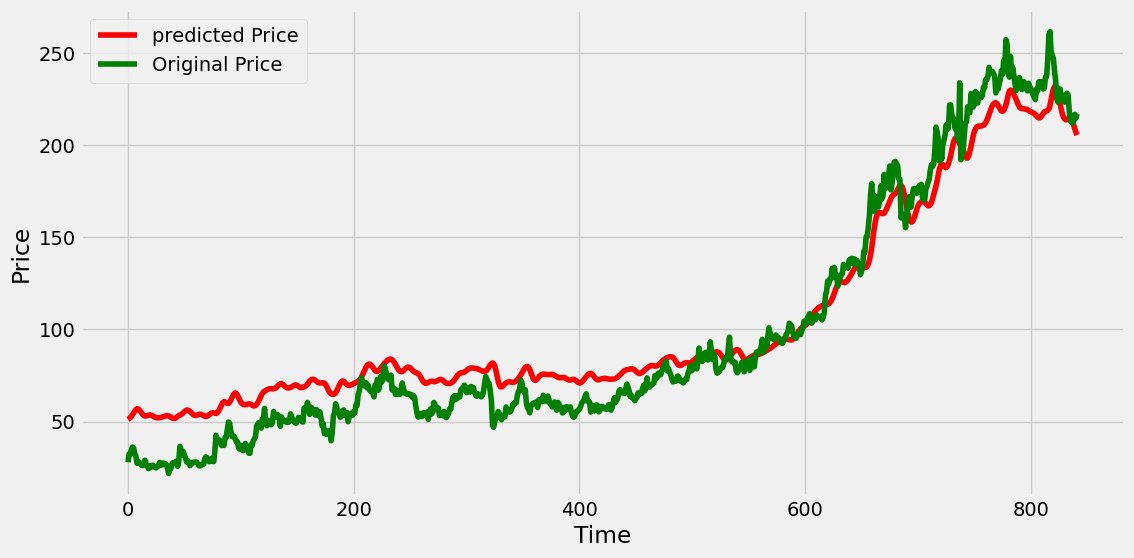

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(y_predict,'r',  label='predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [66]:
model.save('Stock Prediction Model.keras')